In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
import matplotlib as mpl
from scipy.optimize import curve_fit
import metpy.calc as mpcalc
from metpy.units import units
import scipy
import metpy
from sklearn.linear_model import LinearRegression
mpl.rcParams['figure.dpi']= 500

g = 9.80616
Cp = 1004.64
Lv = 2.501e6
#R = 8.34
R = 287

In [2]:
zonal = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/u,v,w/ua_Amon_*.nc'
ds = xr.open_mfdataset(zonal)

In [3]:
spec = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/MSE/hus_Amon_*.nc'
ds1 = xr.open_mfdataset(spec)

In [23]:
grid1 = ds.sel(lat=slice(10,25), lon=70)
months = grid1.time.dt.month.isin(range(6, 10))
JJAS = grid1.sel(time=months)
clim=JJAS.resample(time="10AS").mean()
u = clim.ua.mean(dim=['lat'])

In [12]:
grid1 = ds1.sel(lat=slice(10,25), lon=70)
months = grid1.time.dt.month.isin(range(6, 10))
JJAS = grid1.sel(time=months)
clim=JJAS.resample(time="10AS").mean()
q = clim.hus.mean(dim=['lat'])

In [31]:
u850 = u.sel(plev='85000')

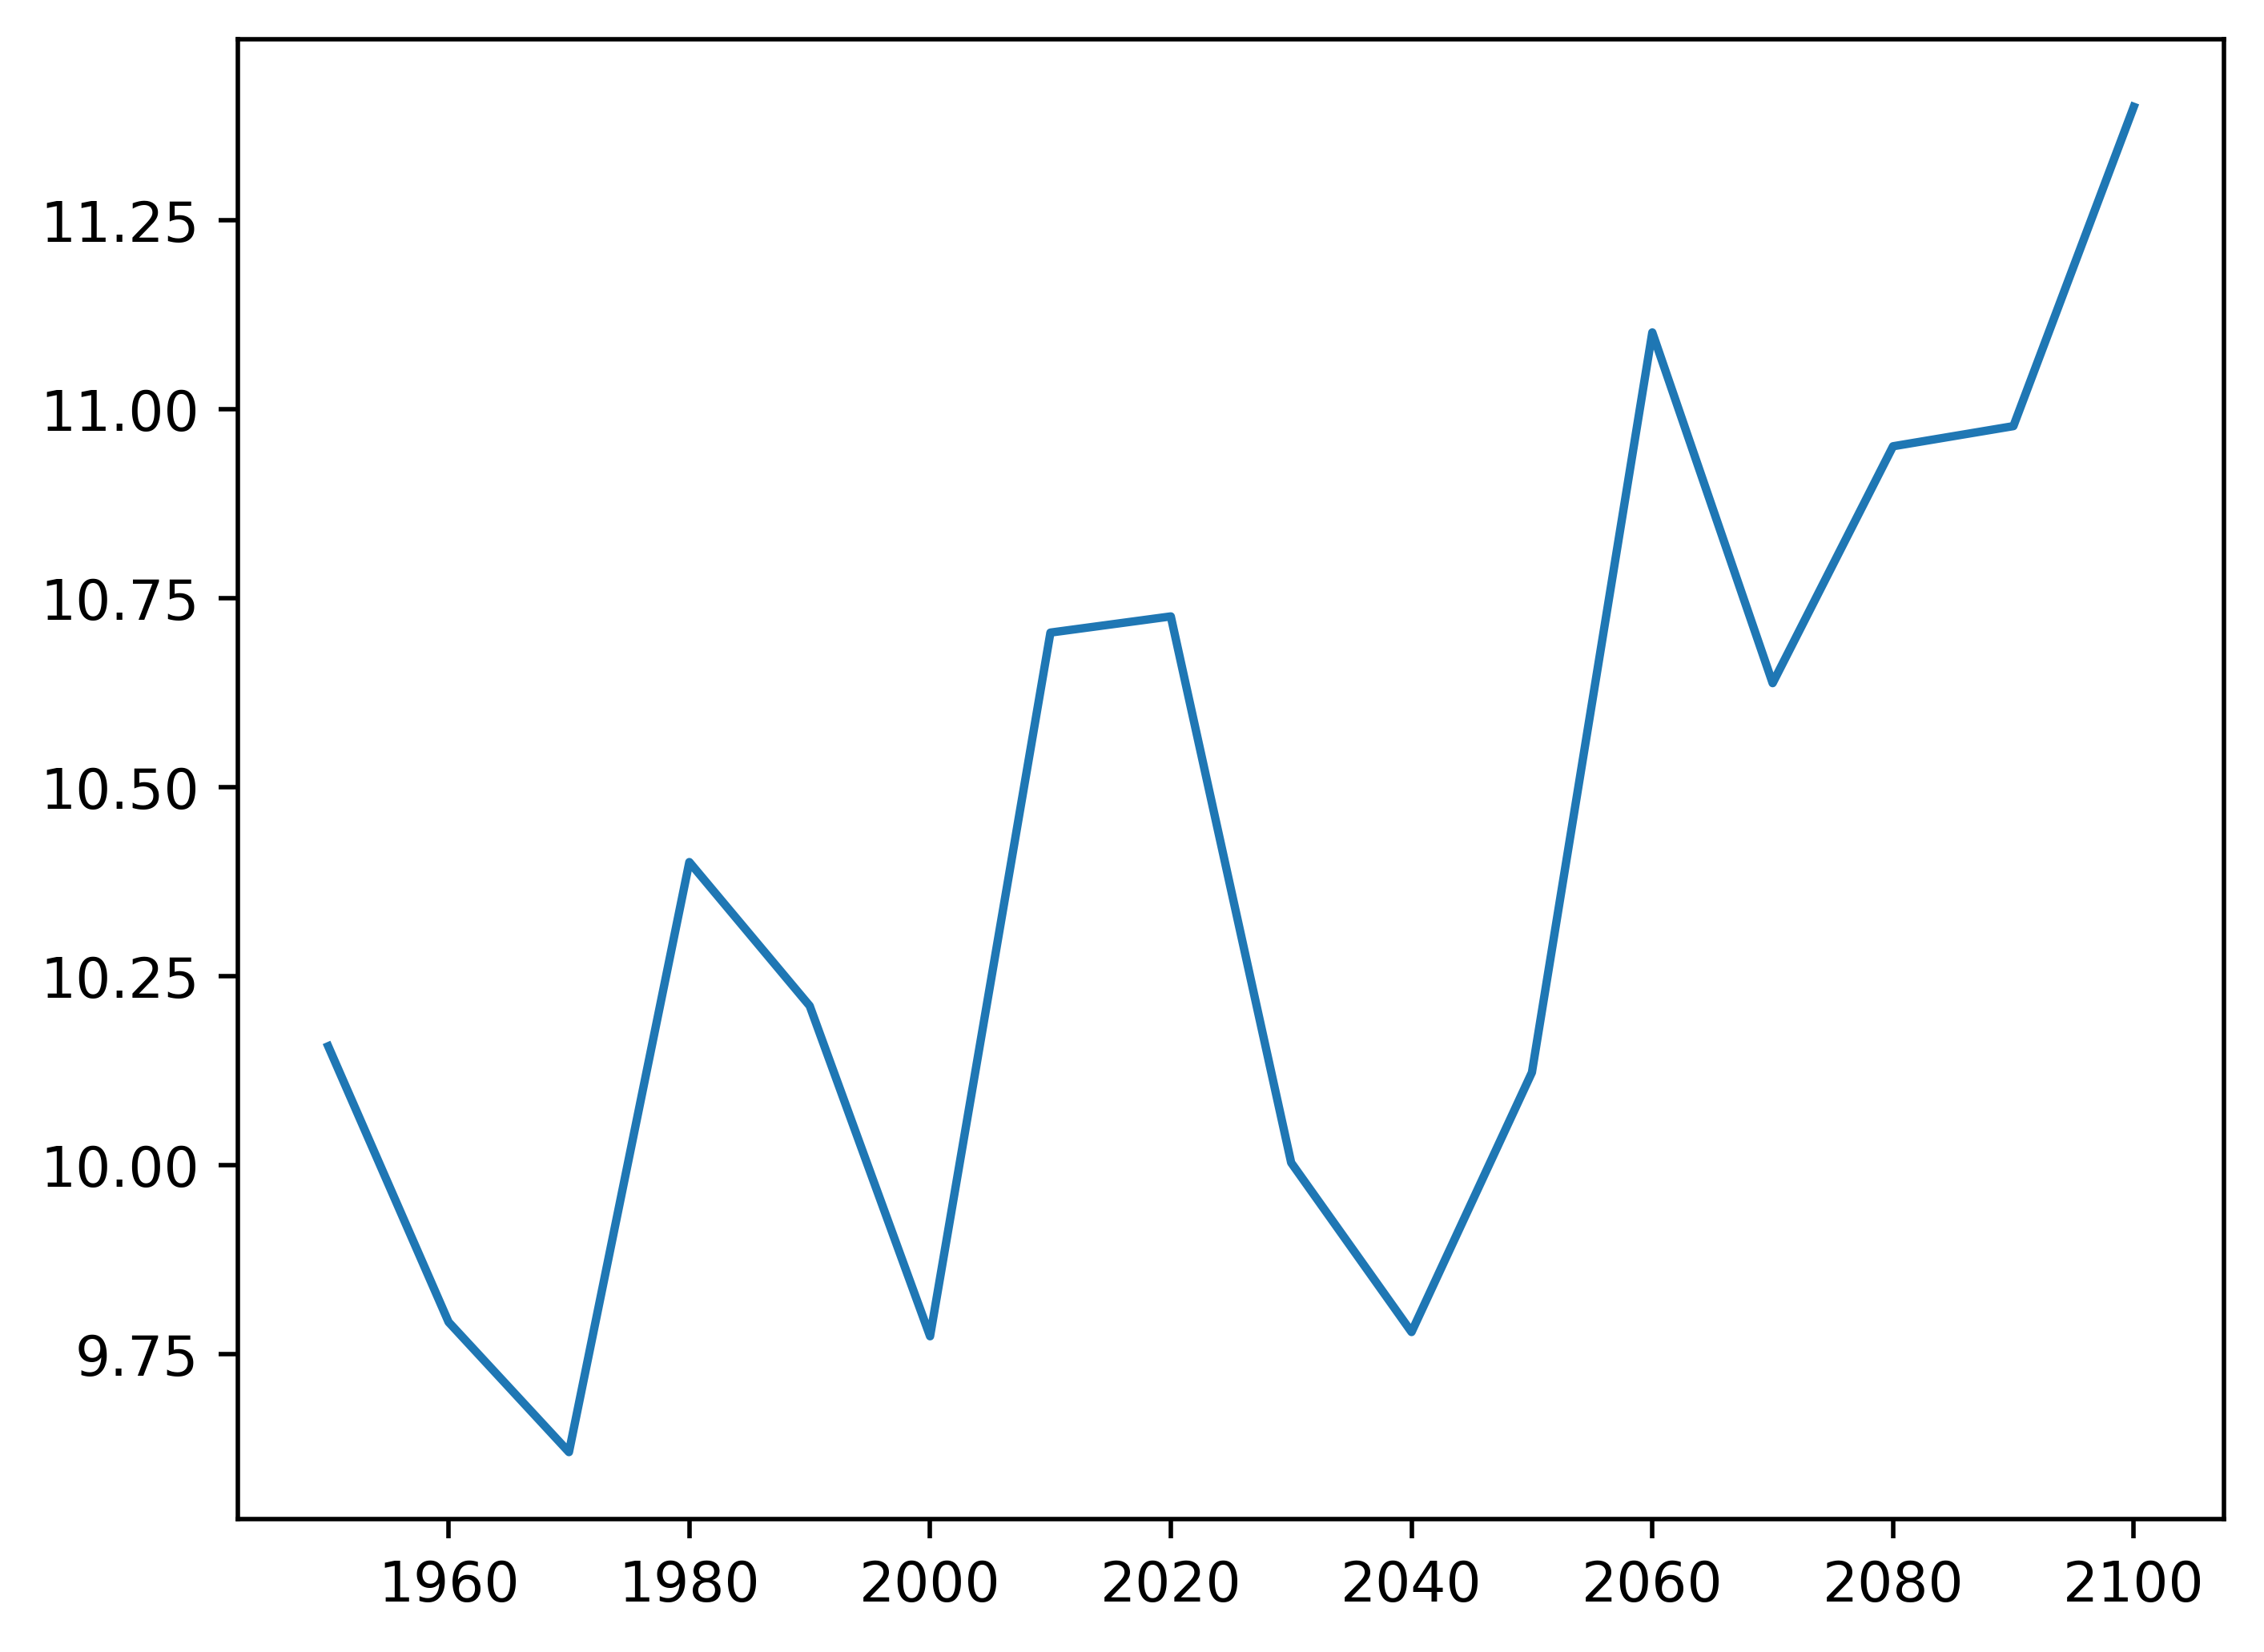

In [33]:
plt.plot(X, u850)

In [28]:
uq = u*q

In [18]:
flux = uq.integrate('plev')

In [42]:
Pr = np.array([6.32024584, 7.18520922, 6.77385621, 7.05437106, 6.81804225,
       7.41475874, 7.67615782, 7.2390839 , 7.7341608 , 7.02068838,
       7.52371824, 7.46292472, 7.78371231, 7.27524091, 7.36451636,
       7.97523397, 7.58148863, 6.78929631, 8.18087496, 8.36727885,
       8.50451596, 8.81076932, 9.02199077, 9.40212475, 9.68582116,
       9.82207004])

In [34]:
uqdz =  np.array([-3309.8480244 , -3215.04563637, -3202.91618924, -3440.65699639,
       -3333.81108198, -3301.06938436, -3680.86895435, -3601.73373938,
       -3633.32781276, -3652.87019454, -3795.98914333, -4365.99528778,
       -4300.55668648, -4615.88499145, -4729.9586664 , -5168.35722894])

In [41]:
flux = uqdz/g

In [32]:
X = np.arange(1950, 2110, 10)

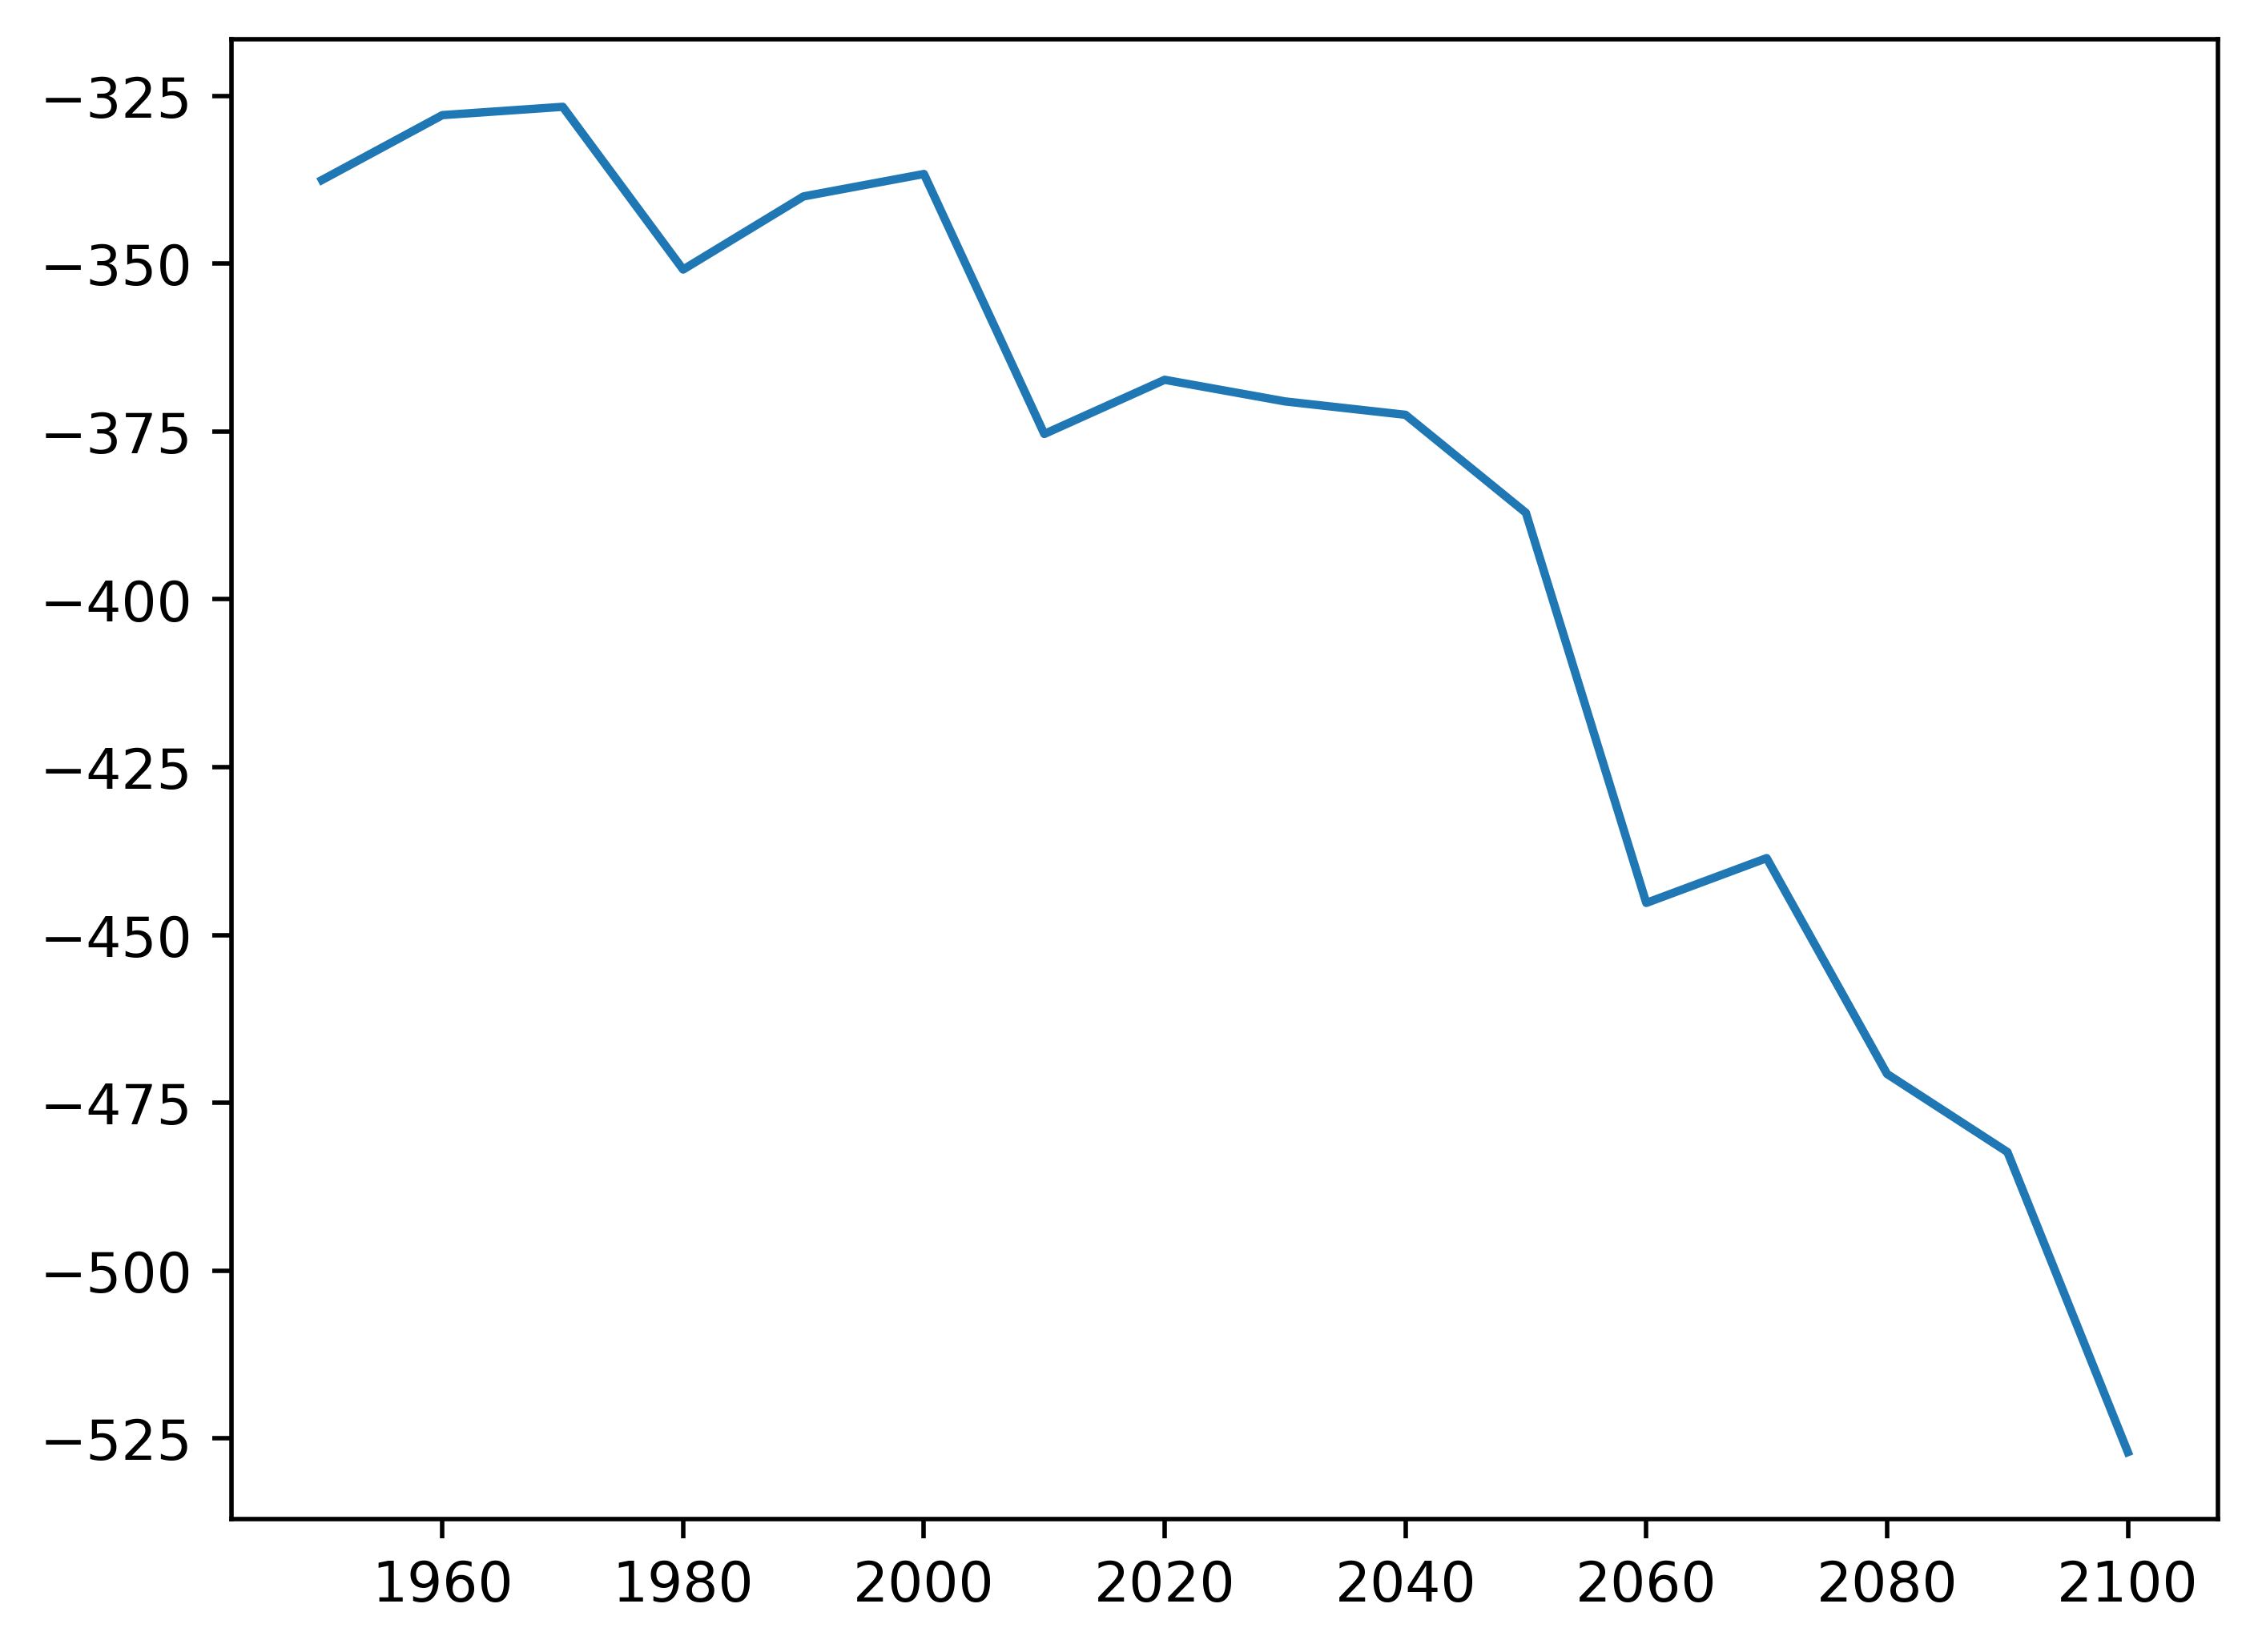

In [43]:
plt.plot(X, flux)

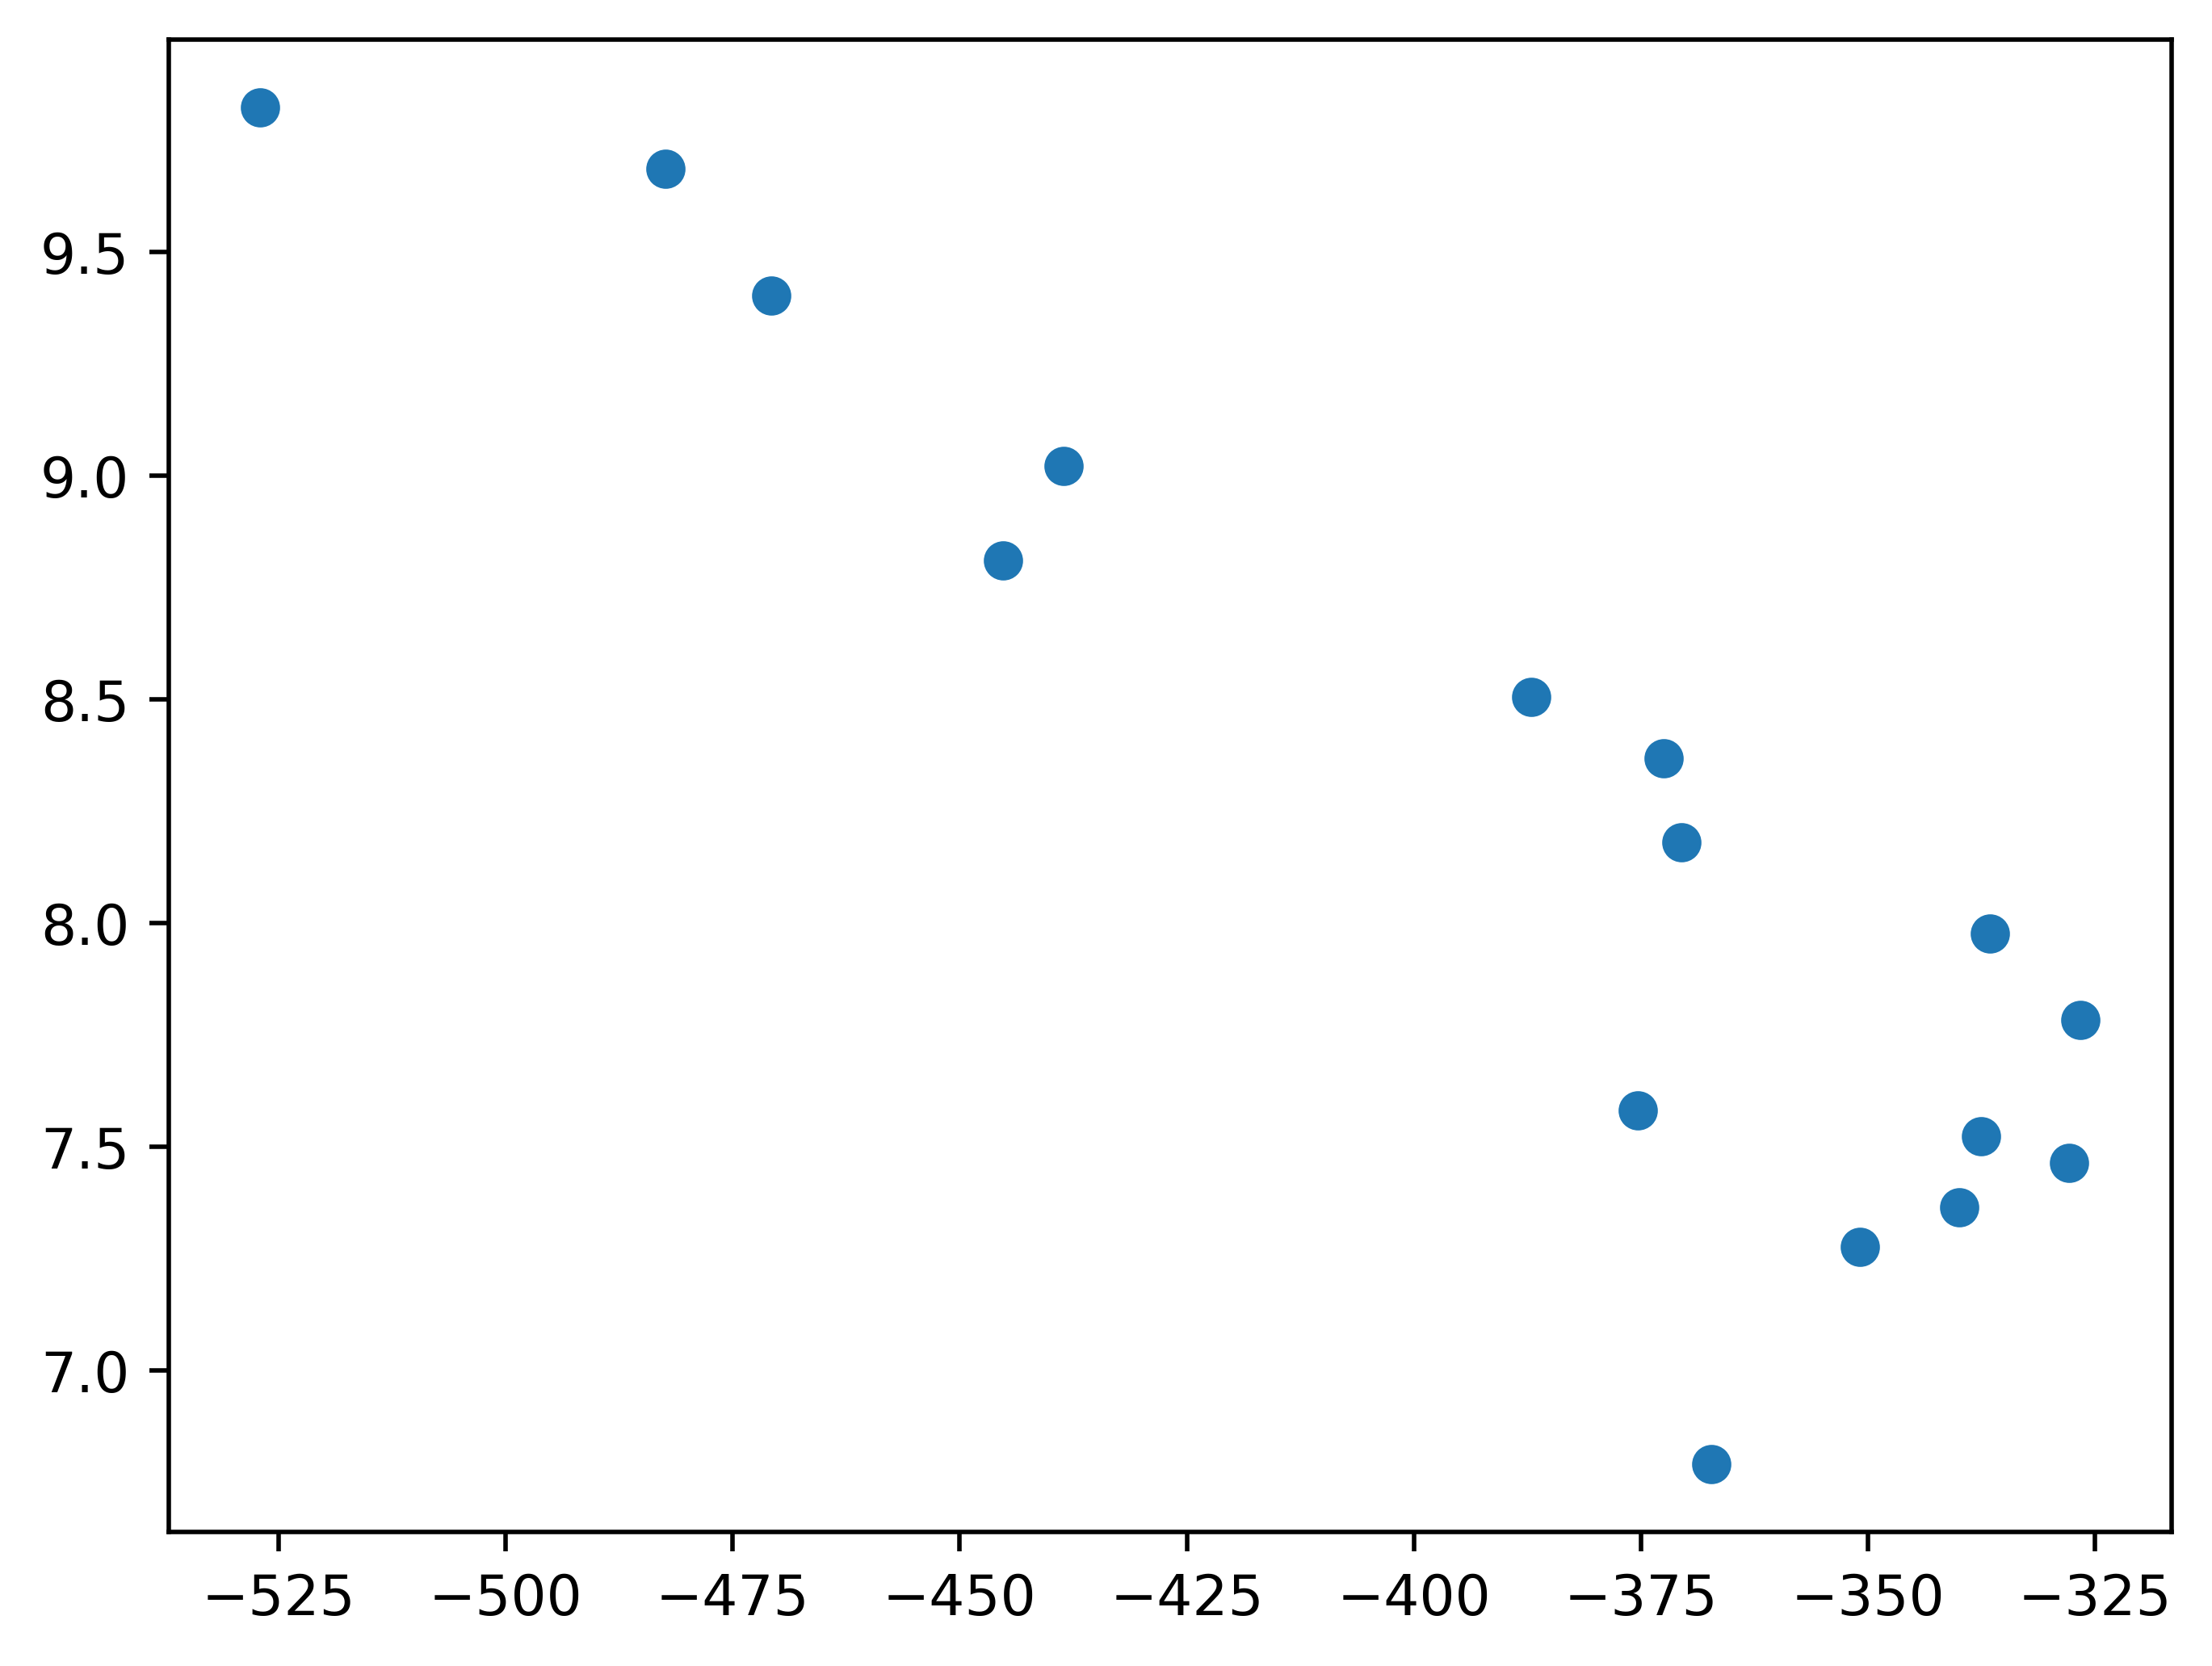

In [45]:
plt.scatter(flux, Pr[10:])

Text(0.5, 1.0, 'Column-mean zonal wind over Arabian sea (10-25N, 70E)')

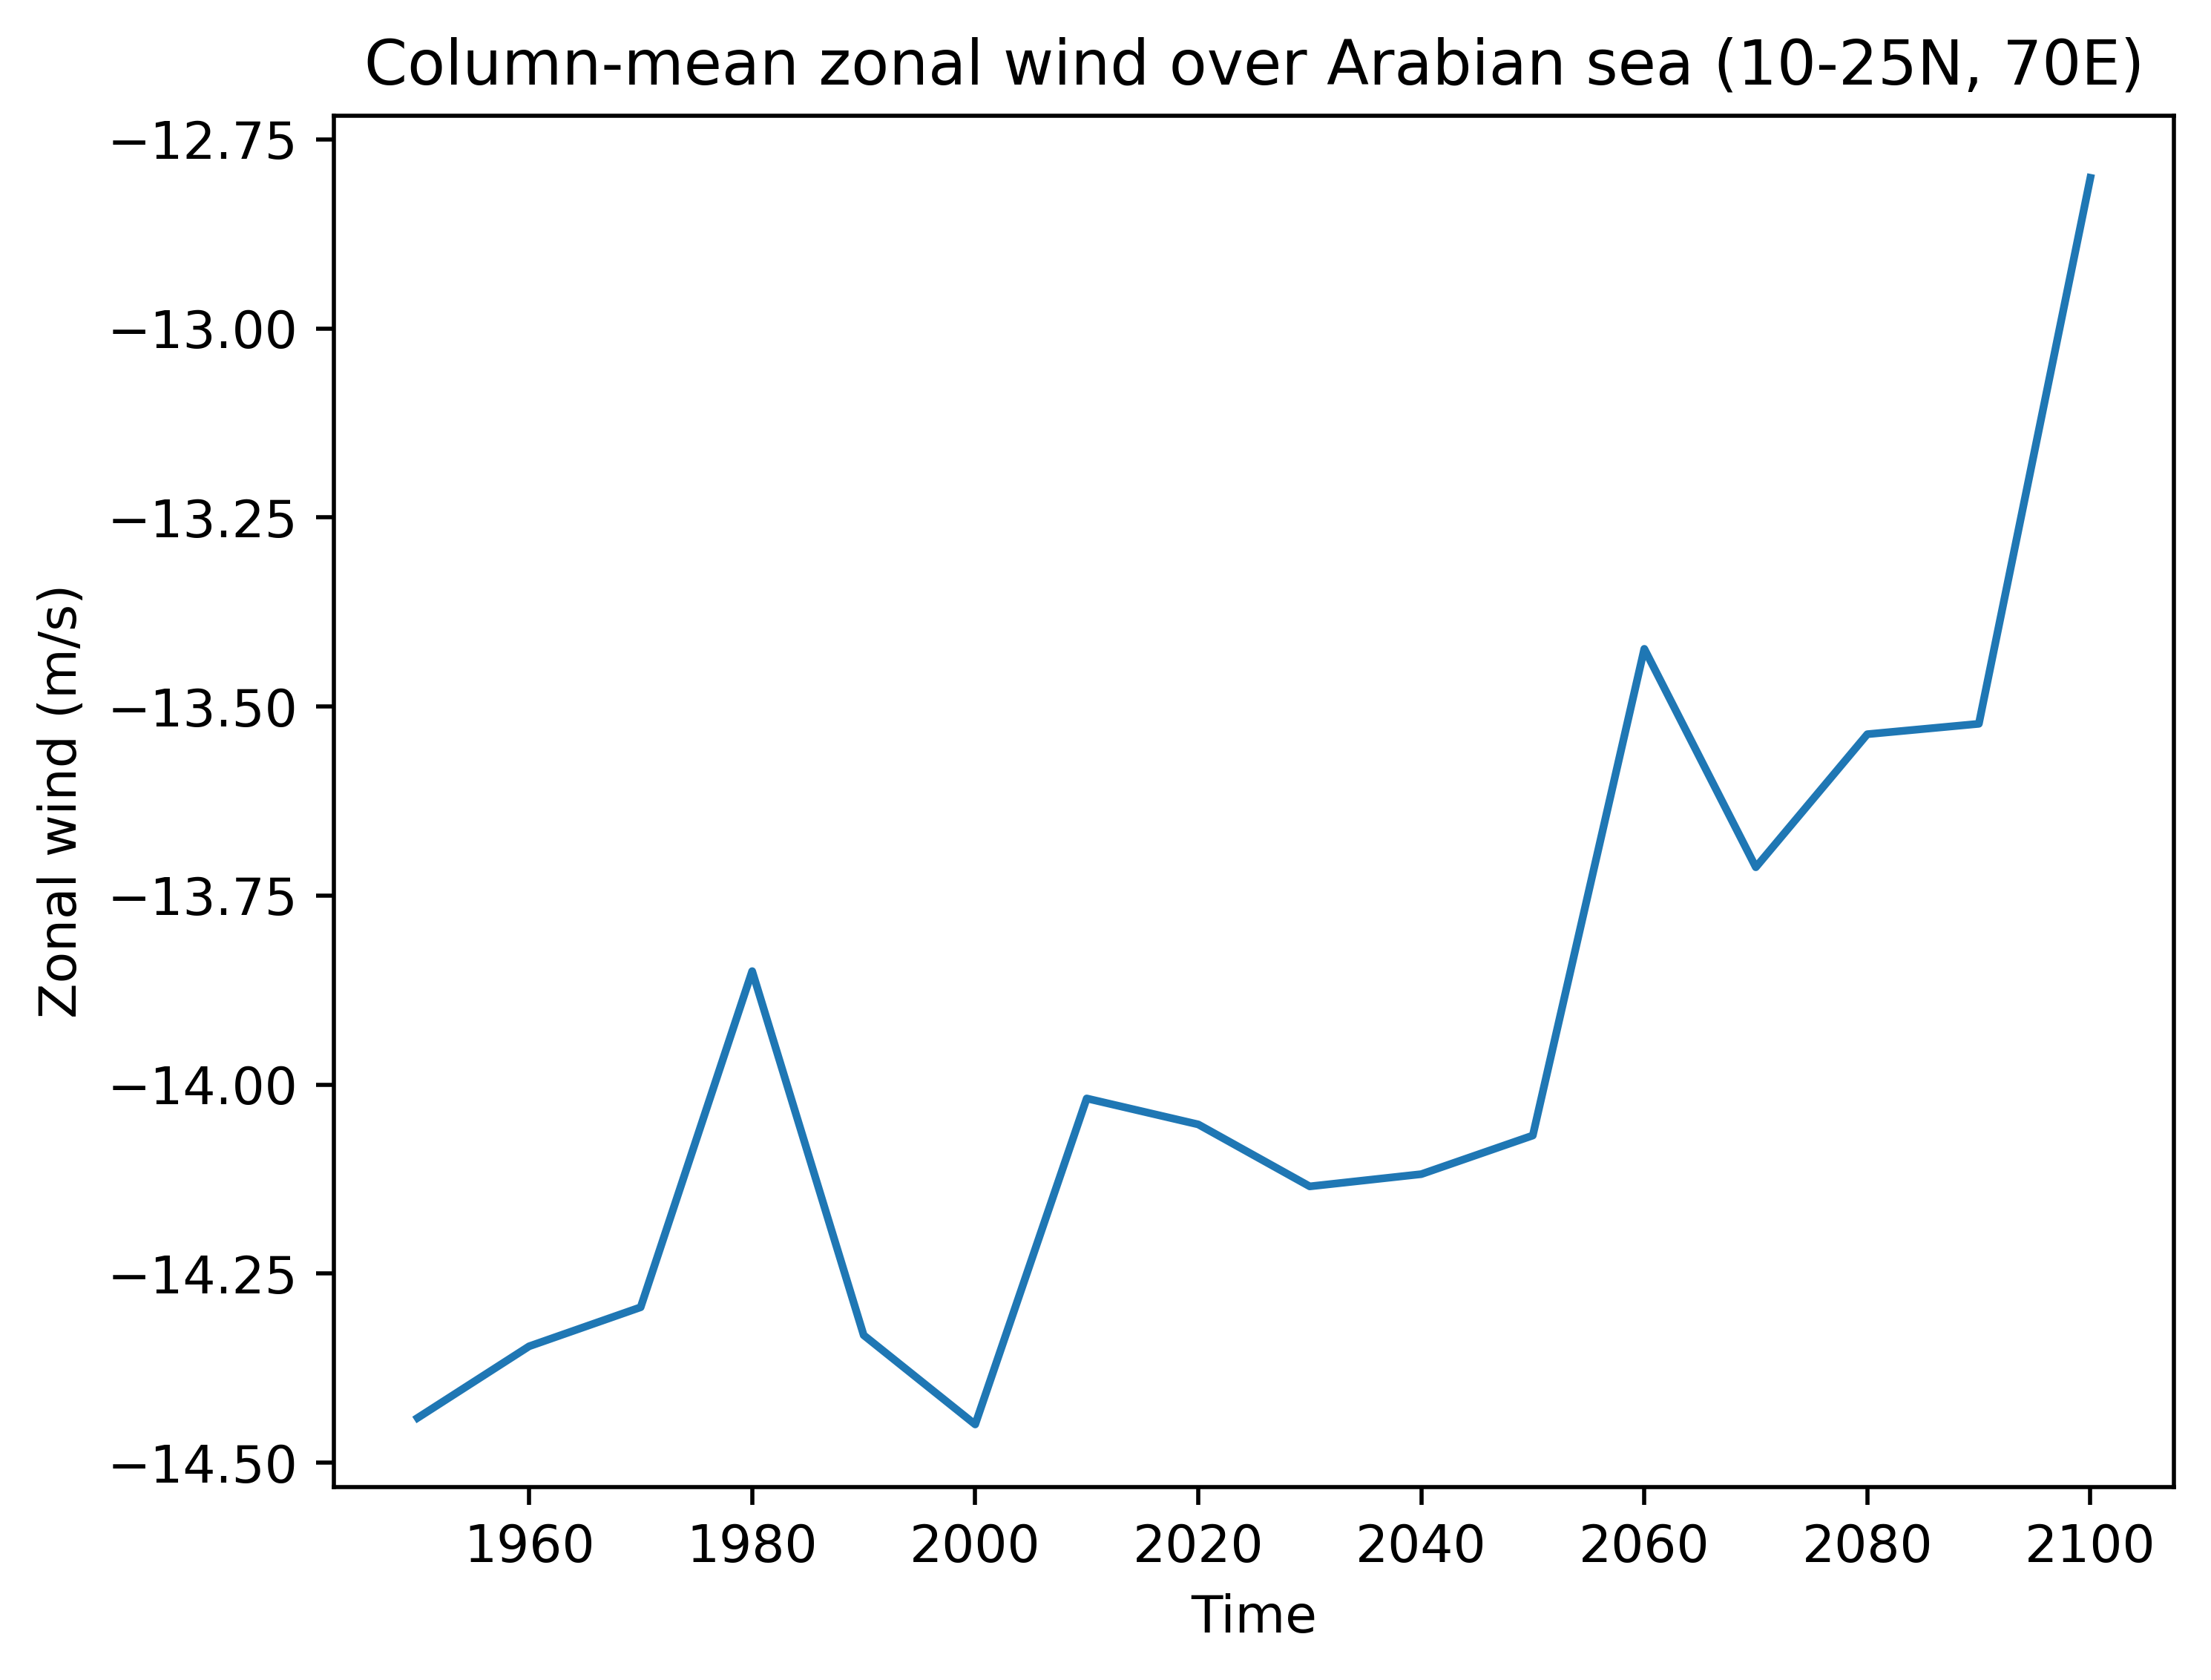

In [54]:
plt.plot(X, uavg)
plt.xlabel('Time')
plt.ylabel('Zonal wind (m/s)')
plt.title('Column-mean zonal wind over Arabian sea (10-25N, 70E)')

In [36]:
model2 = '/media/rakshith/Seagate Expansion Drive/Good models/CMCC/*.nc'
cmcc = xr.open_mfdataset(model2)

In [37]:
grid1 = cmcc.sel(lat=slice(10,30), lon=slice(70,90))
months = grid1.time.dt.month.isin(range(6, 10))
JJAS = grid1.sel(time=months) 

lon_grid1, lat_grid1 = np.meshgrid(grid1.lon, grid1.lat)
mask1 = globe.is_land(lat_grid1, lon_grid1)

In [38]:
clim=JJAS.resample(time="10AS").mean()

In [39]:
Pr = 86400*(clim.pr.where(mask1>0).mean(dim=['lat', 'lon']))

In [59]:
uPwat = uavg*Pwat

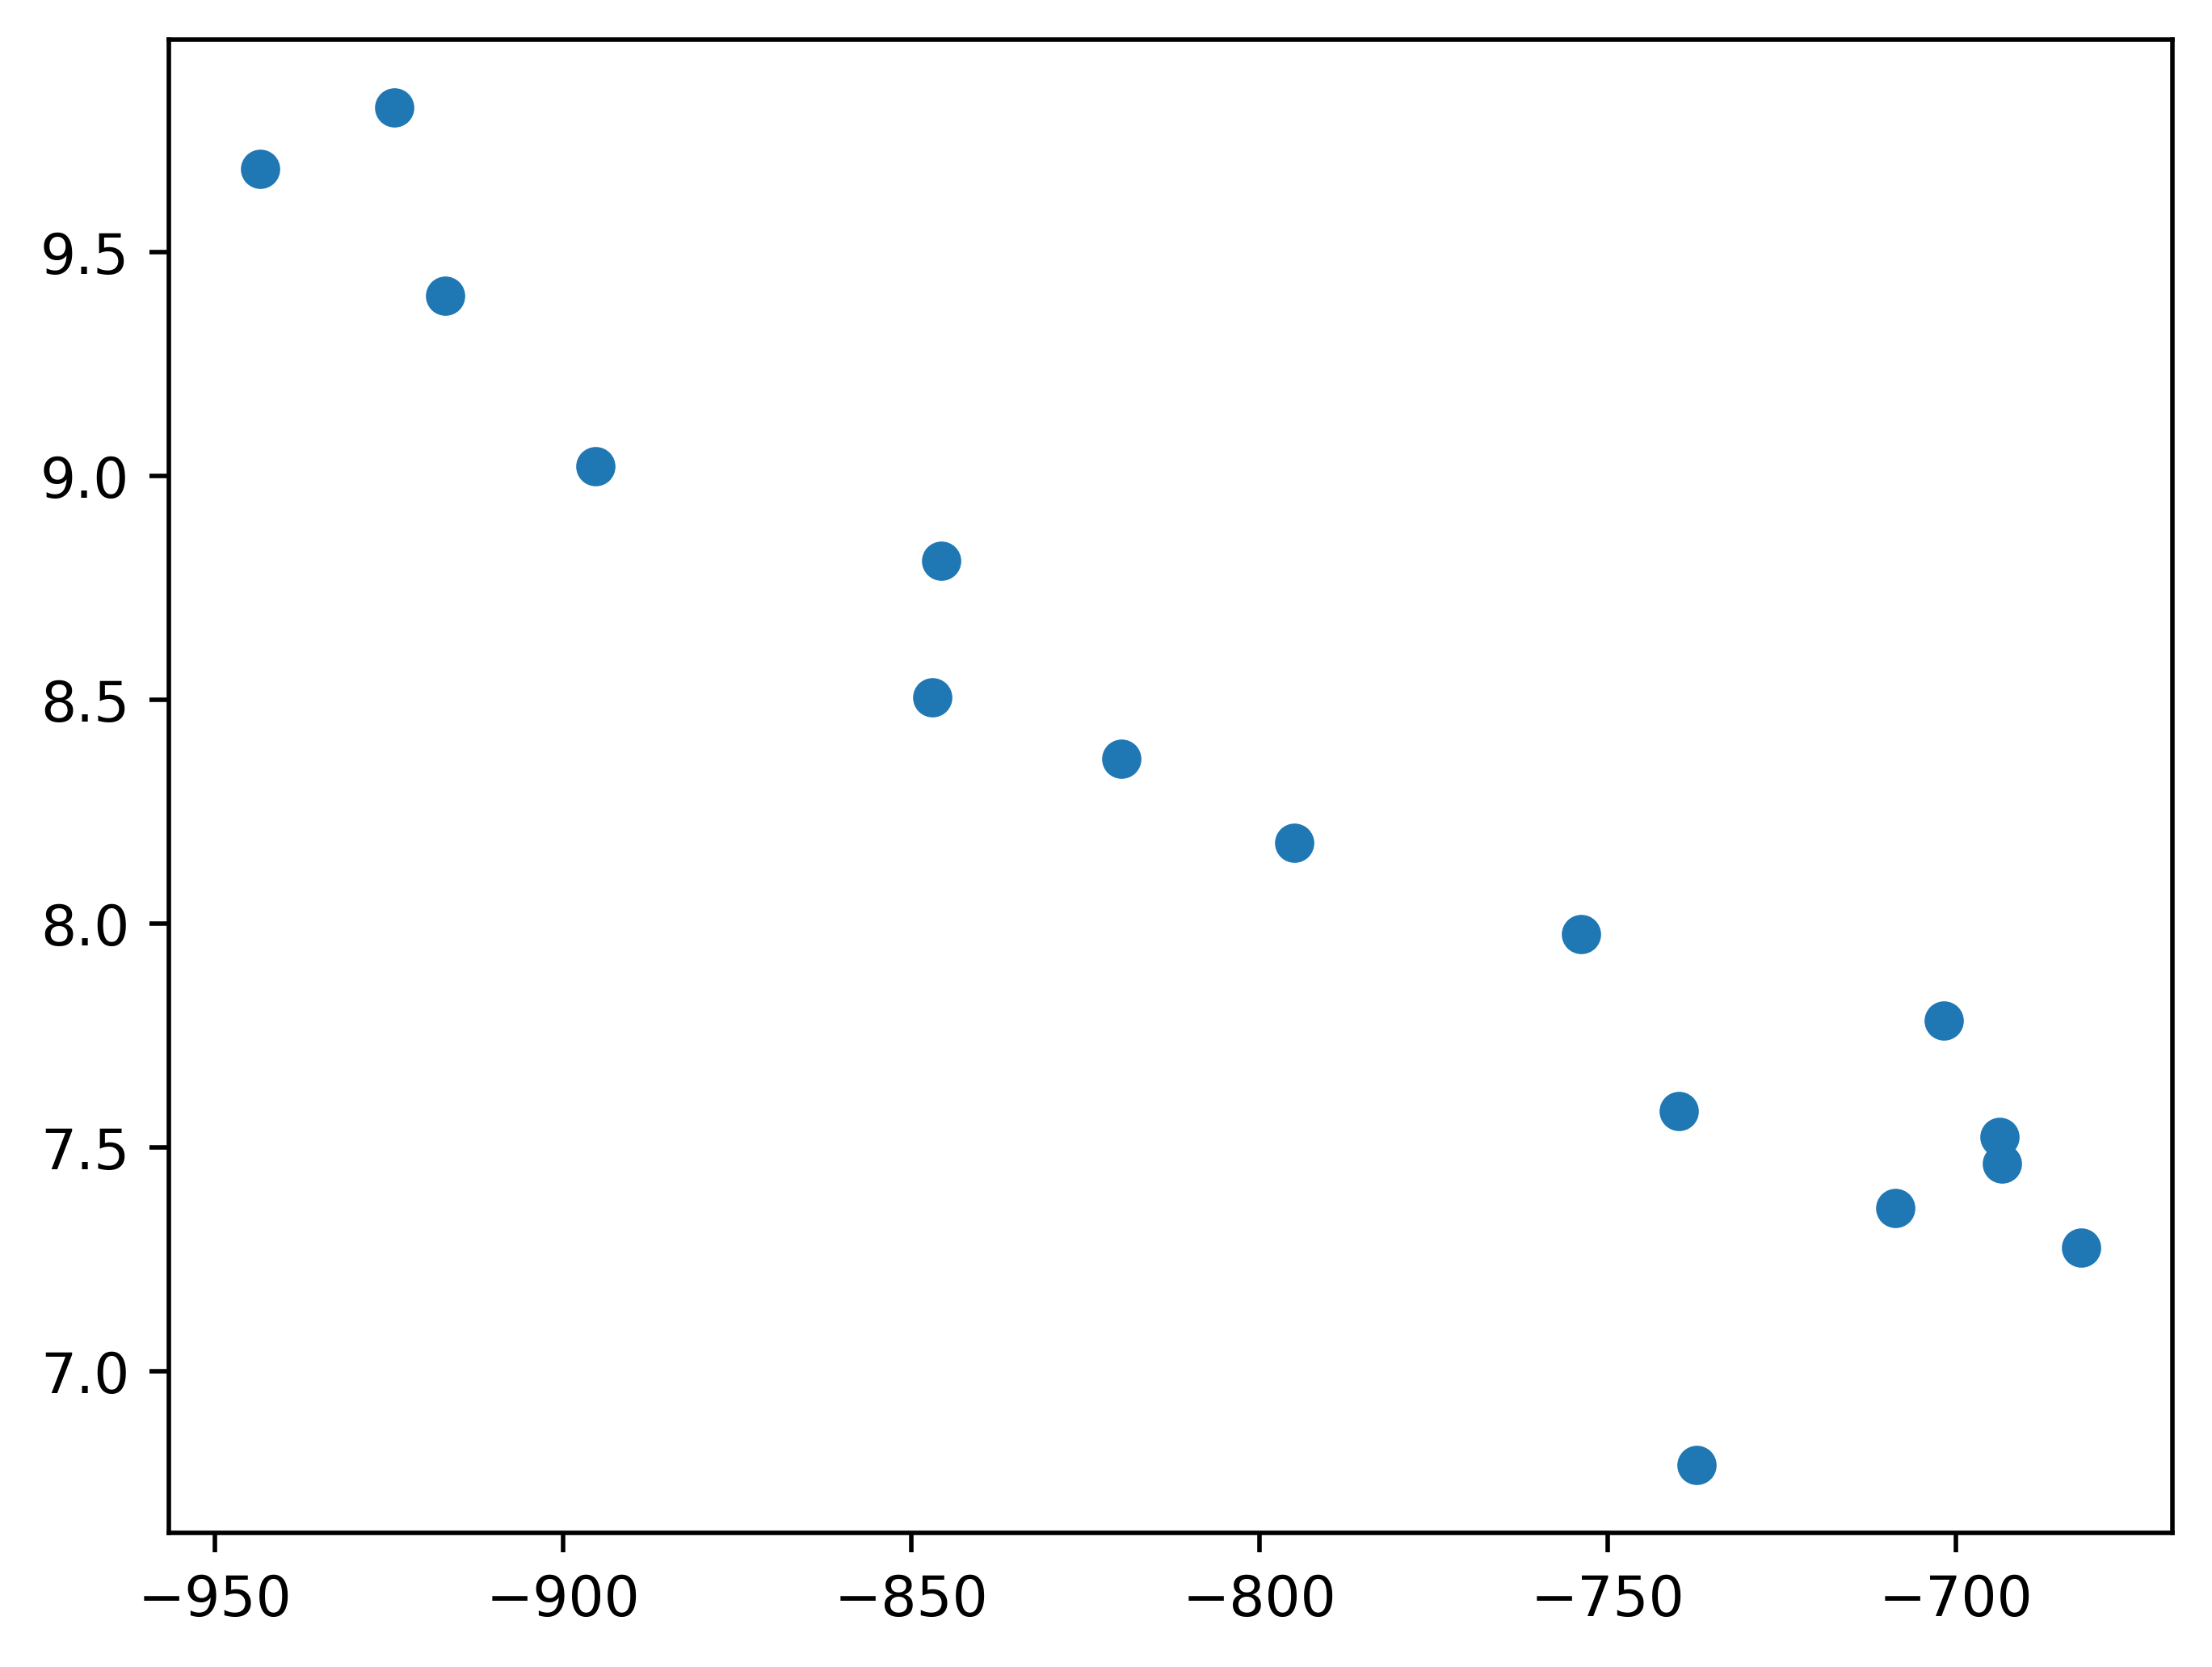

In [64]:
plt.scatter(uPwat, Pr[10:])